# Project Description

##### Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is torecieve the best medical care without any strain or your finance. Health insurance plan offer protection against high medical. costs. It covers hospitlisation expenses, day care procedures, domiciliry expenses, and ambulance charge, beside many other. Based on certain input features such as age, bmi,,no of dependent, smoker, region medical insurance is calculated.

### In this dataset we predict the insurance costs

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from datetime import datetime, date
import warnings
warnings.filterwarnings("ignore")

## Importing Dataset

In [2]:
df=pd.read_csv("insurance.csv")

In [3]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
922,38,male,31.000,1,no,southwest,5488.26200
703,34,female,26.410,1,no,northwest,5385.33790
923,34,male,35.815,0,no,northwest,4320.41085
179,41,female,33.155,3,no,northeast,8538.28845
826,56,male,31.790,2,yes,southeast,43813.86610


#### These dataset containt the data of medical cost insurance. On the basic of the data we have to predict the insurance costs. These datasets contain the data like "Age", "Sex", "Bmi", "Children", "Smoker", "Region", "Charges". In medicalcost insurance in this dataset my "Charges" culumns is target variable. 

In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## Exploratory Data Analysis

In [5]:
#Check the dimention of the target
df.shape

(1338, 7)

In [6]:
print("the dimentions of the target :",df.shape)
print("the columns headers :", df.columns)

the dimentions of the target : (1338, 7)
the columns headers : Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


###### Here we can see the dataset contain 1330 rows and 7 columns

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# cheking the type of columns 
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
# now checking null values in this dataset
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [12]:
df["children"].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [13]:
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [14]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

#### As we clear that there is no null value present in this dataset.

<Axes: >

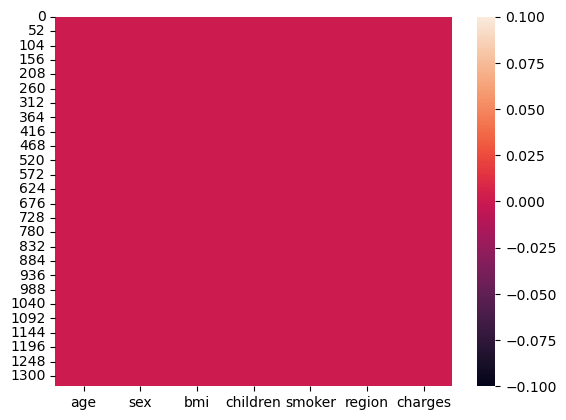

In [15]:
# lets visulies it using heatmap
sns.heatmap(df.isnull())

In [16]:
# Count value of each columns
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

##### Here is the details of this dataset in numerical columns

In [17]:
# Separating Numerical and Categarical columns
# Checking for Categorical columns
categorical_co=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_co.append(i)
print("categorical columns :",categorical_co)
print("\n")

# Checking for numerical columns
numerical_co=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_co.append(i)
print("numerical columns :",numerical_co)

categorical columns : ['sex', 'smoker', 'region']


numerical columns : ['age', 'bmi', 'children', 'charges']


##### Here you can clear see that there is Three columns contain Categorical data and Four columns contain Numerical columns

In [18]:
# Checking number of unique values in each columns
df.nunique().to_frame("No. of unique values")

,No. of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [19]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Checking duplicates in DataFrame

In [20]:
print("Total Duplicate Rows are :",df.duplicated().sum())

Total Duplicate Rows are : 1


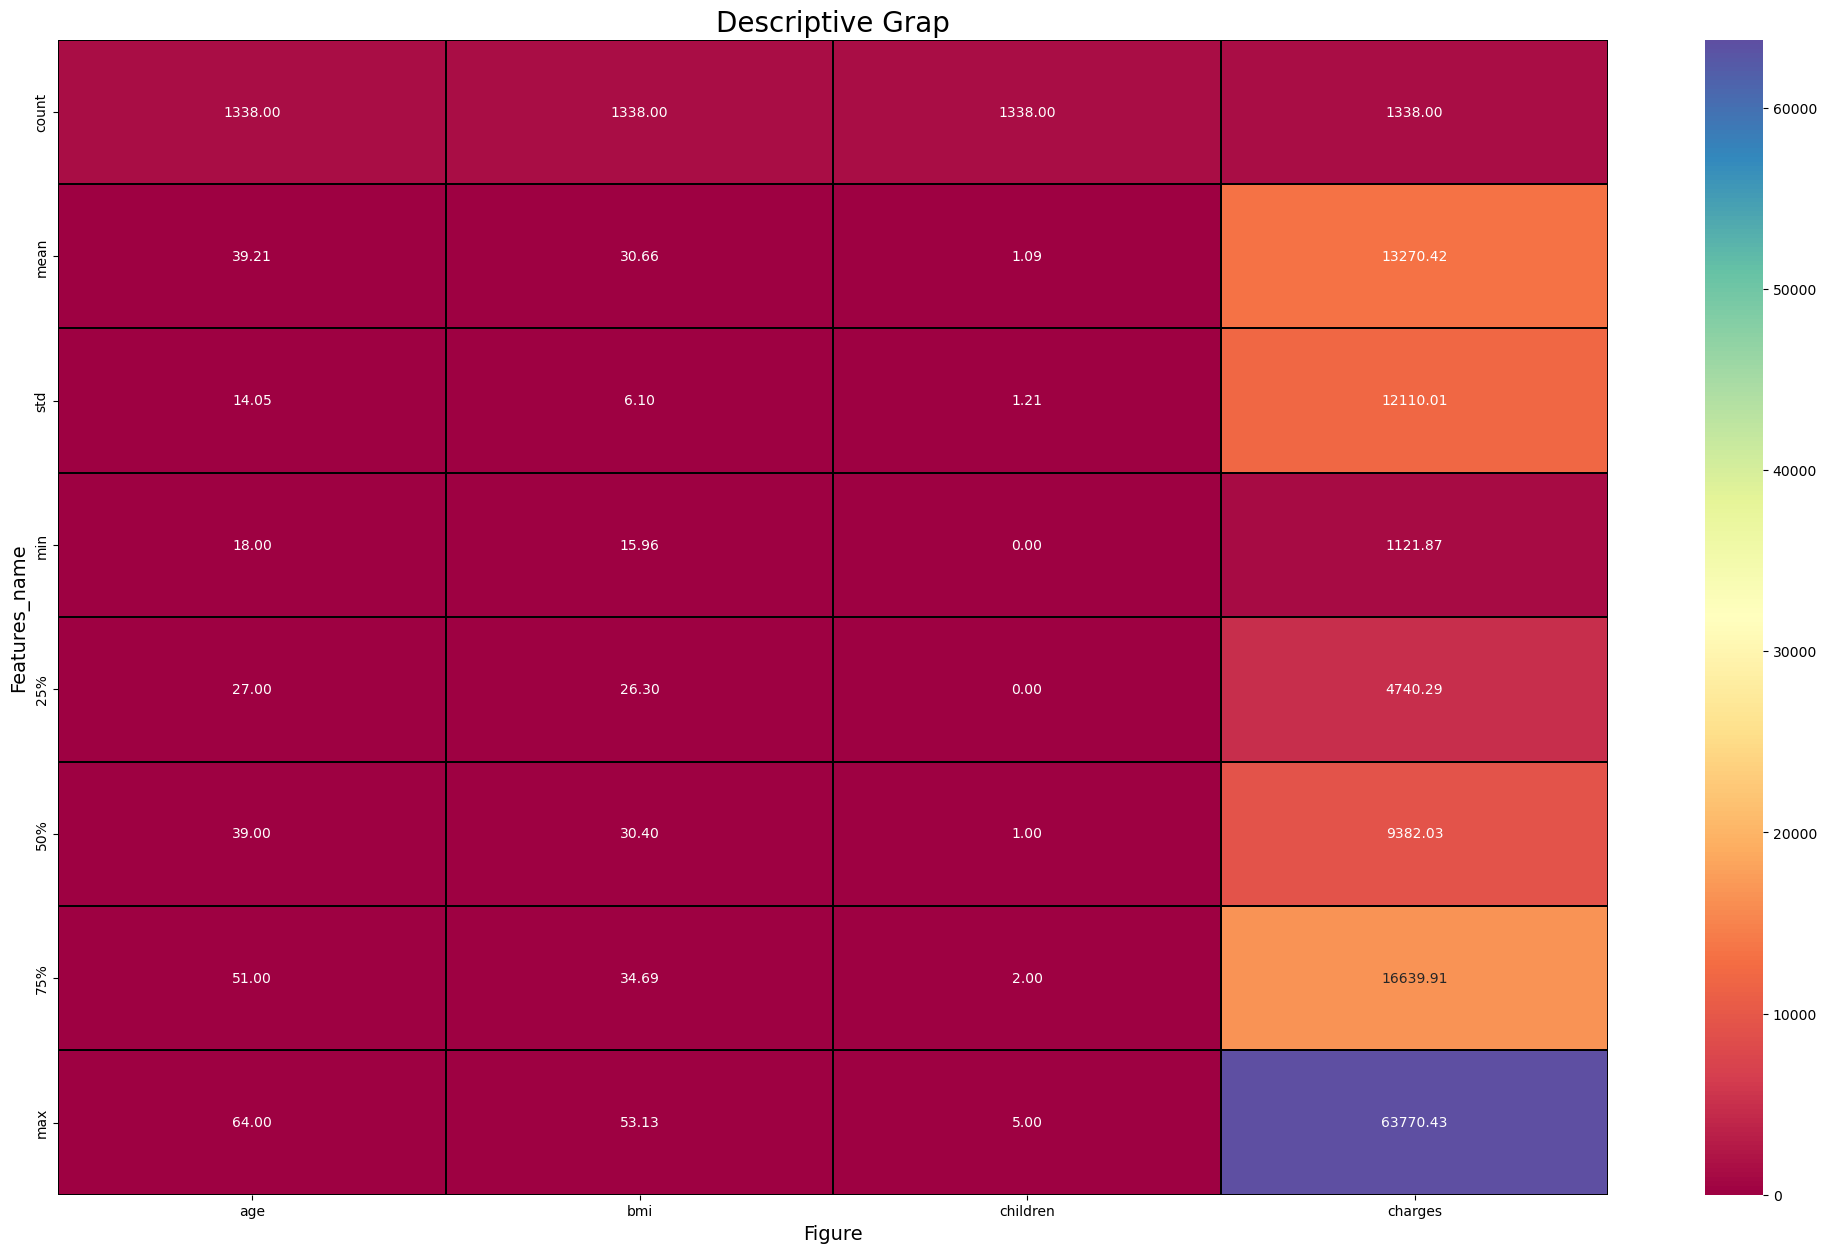

In [21]:
plt.figure(figsize =(25,15))
sns.heatmap(df.describe(),annot = True , fmt="0.2f", linewidth = .2, linecolor= "black",cmap="Spectral")
plt.xlabel("Figure",fontsize = 14)
plt.ylabel("Features_name", fontsize = 14)
plt.title("Descriptive Grap",fontsize=20)
plt.show()

# Visulize the Data

male      676
female    662
Name: sex, dtype: int64


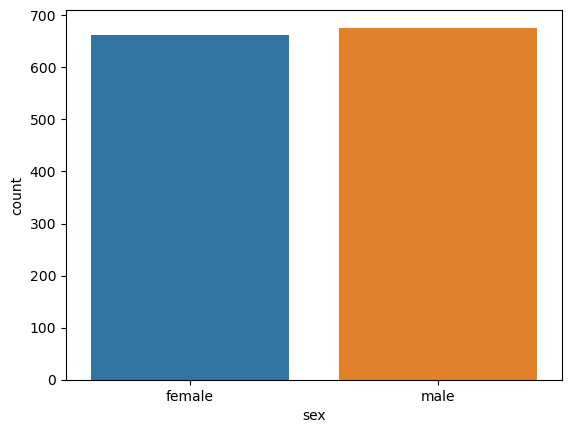

In [22]:
# Visulize the number of people
ax=sns.countplot(x="sex",data=df)
print(df["sex"].value_counts())

##### As you can see, both male and female same. But male is more as compared to female

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


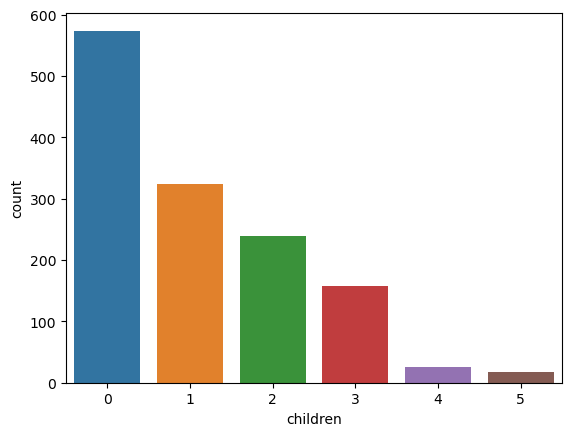

In [23]:
# visulize the number of Children
ax=sns.countplot(x="children",data=df)
print(df["children"].value_counts())

##### The 'children' columns in thr Medical Cost insurance Dataset represent children which represent the number of children a policy holder has who ar under the age of 18. If this columns is field as '0' , it means that the policy holder has no children . Whereas if it is filled as '1','2','3' etc., it shows that the policy holder has that number of children.

##### But in this dataset whose policy holder children is "Zero" is more as to other holder policy

no     1064
yes     274
Name: smoker, dtype: int64


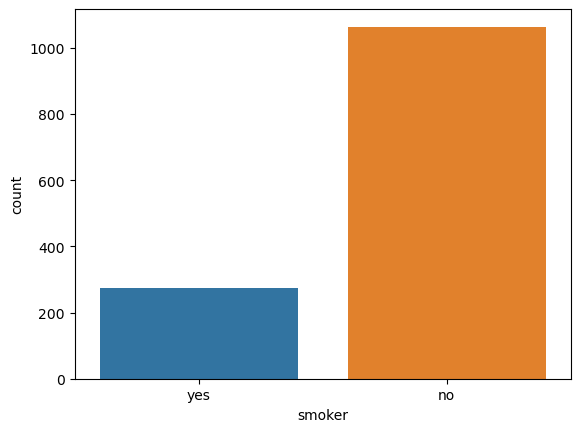

In [24]:
# Visulize the number of smoker
ax=sns.countplot(x='smoker',data=df)
print(df["smoker"].value_counts())

##### The 'smoker' column in the medical cost insurance dataset provides information about smoking. This column indicates whether the person smoker or not. If a person has a habit of smoking, they are labeled as a 'smoker'. This information can be used in calculation insurance premiums or in the transfer process, as individuals who smokw may be expected to have higher medical expenses.

###### But in this dataset non-smokers are more likely to smoke than smokers.

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


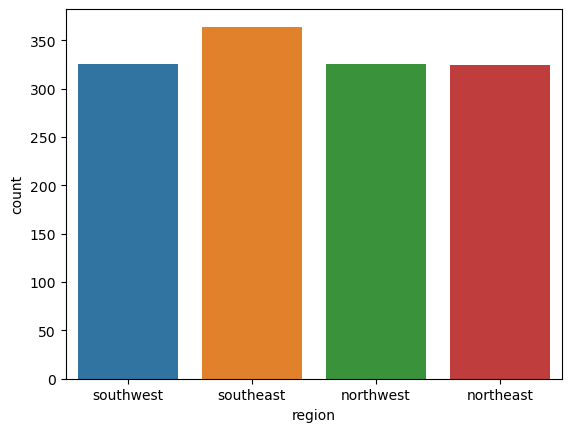

In [25]:
# Visualize the number of region
ax=sns.countplot(x="region",data=df)
print(df["region"].value_counts())

##### In 'region' column typically indicates the geographic region where the insured individual resides or is covered under the insurance plan. Here we can see that for those people who lives in southeast is getting more insurance as compared to other.

In [26]:
# Here we check the maximum and minimum quality rate
print("Min. charges taken from insurance :",df.charges.min())
print("Max. charges taken from insurance :",df.charges.max())

Min. charges taken from insurance : 1121.8739
Max. charges taken from insurance : 63770.42801


##### Here we can in this dataset has lowest charge is 1121 and highest charges is 63770

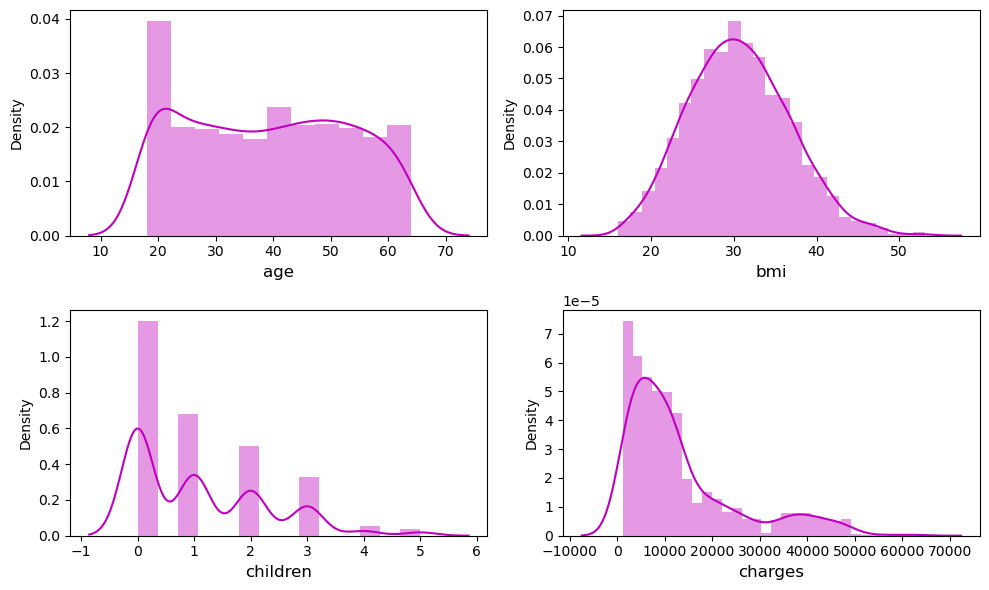

In [27]:
# Let's check the how the data has been distributed in remaining column
plt.figure(figsize=(10,6),facecolor="white")
plotnumber=1
for col in numerical_co:
    ax=plt.subplot(2,2,plotnumber)
    sns.distplot(df[col],color="m")
    plt.xlabel(col,fontsize=12)
    plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

# Relation Analysis

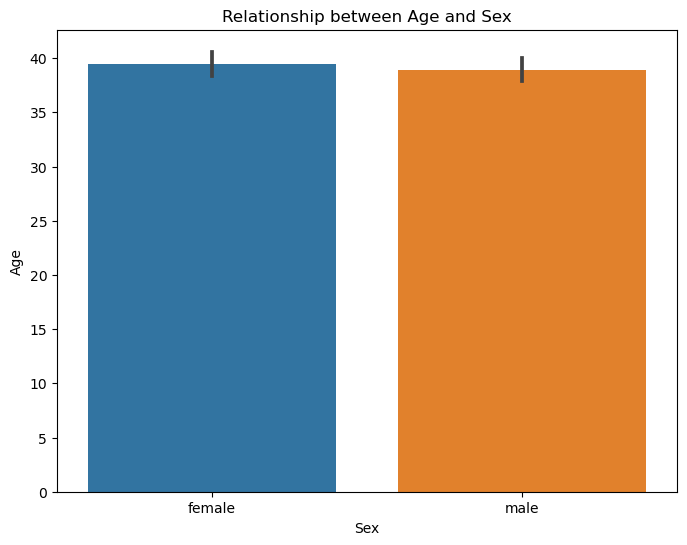

In [28]:
plt.figure(figsize=(8, 6))  # Adjust the figure as needed

# Create the bar plot
sns.barplot(x="sex",y="age", data=df)

# Set label and title
plt.xlabel("Sex")
plt.ylabel("Age")
plt.title("Relationship between Age and Sex")

# Show the plot

plt.show()

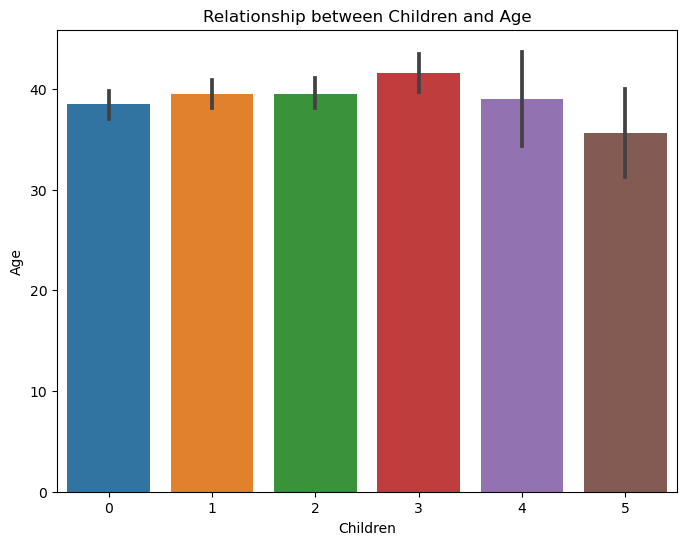

In [29]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="children", y="age",data=df)

# Set labels and title
plt.xlabel("Children")
plt.ylabel("Age")
plt.title("Relationship between Children and Age")

# Show the plot
plt.show()

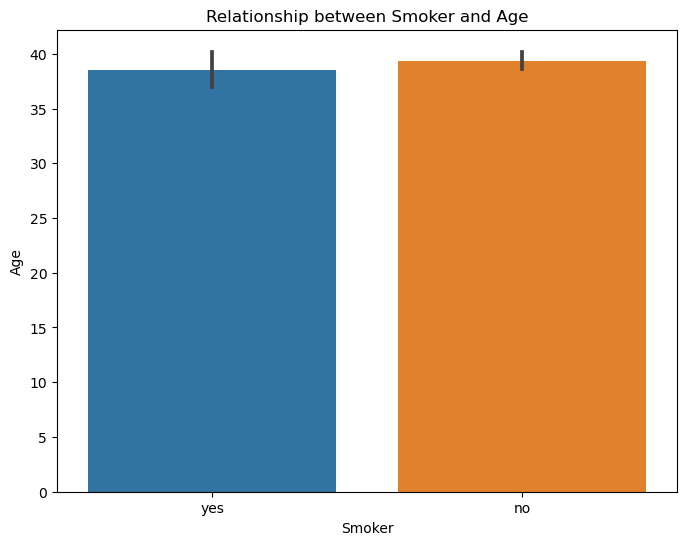

In [30]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="smoker", y="age",data=df)

# Set labels and title
plt.xlabel("Smoker")
plt.ylabel("Age")
plt.title("Relationship between Smoker and Age")

# Show the plot
plt.show()

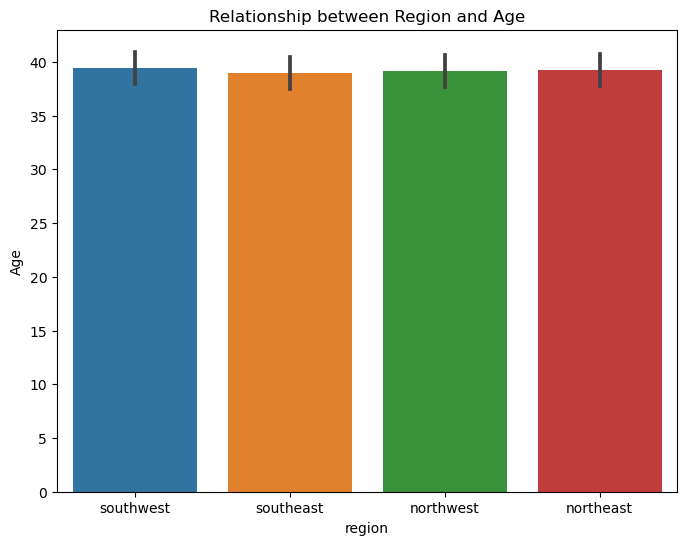

In [31]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="region", y="age",data=df)

# Set labels and title
plt.xlabel("region")
plt.ylabel("Age")
plt.title("Relationship between Region and Age")

# Show the plot
plt.show()

# Multivariate analysis

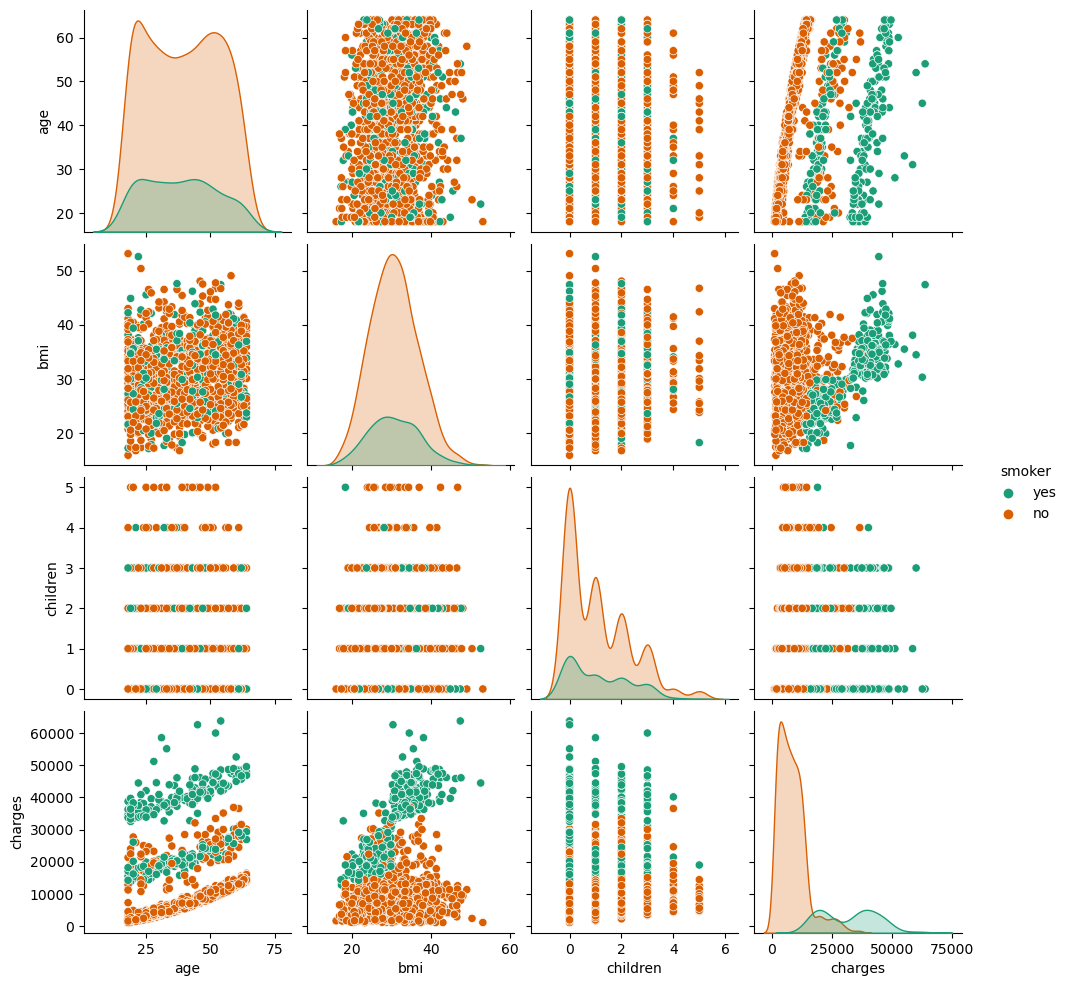

In [32]:
sns.pairplot(df,hue="smoker", palette="Dark2")
plt.show()

# Checking for outliers

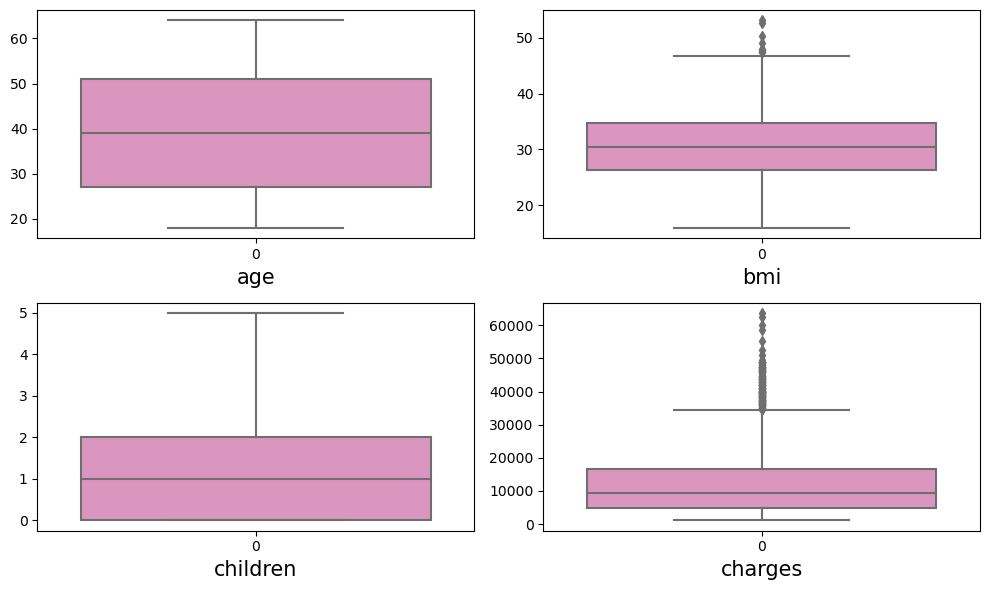

In [33]:
# Lets check the outliers by platting boxplot
plt.figure(figsize=(10,6),facecolor="white")
plotnumber=1
for col in numerical_co:
    if plotnumber <= 4:
        ax=plt.subplot(2,2, plotnumber)
        sns.boxplot(df[col],palette="Set2_r")
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation = 0, fontsize=10)
        plotnumber+=1
plt.tight_layout()

###### Here we can see that there are two column has outlier but charge column is my target variable so no need to charges but in BMI has also outlier so now we will remove outliers.

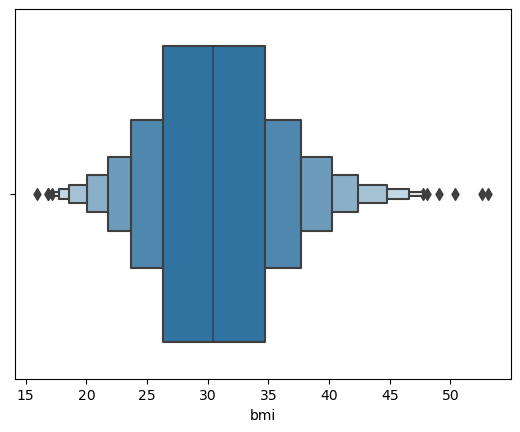

In [34]:
## Checking outliers for bmi boxplot
sns.boxenplot(x=df["bmi"])
plt.show()

# Using IQR methode to remove outliers

In [35]:
# Calculate IQR
Q1 = df["bmi"].quantile(0.25)
Q3 = df["bmi"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [36]:
# Identify outliers
outliers = df.loc[(df["bmi"] < lower_bound) | (df["bmi"] > upper_bound)]

In [37]:
# Remove outliers
df1 = df.loc[(df["bmi"] >= lower_bound) & (df["bmi"] <= upper_bound)]

In [38]:
# print cleaned DataFrame
print("DataFrame after removing outliers :")
print(df1)

DataFrame after removing outliers :
      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1329 rows x 7 columns]


In [39]:
#Optional : print removing outliers
print("\nOutliers removed")
print(outliers)


Outliers removed
      age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1317   18    male  53.13         0     no  southeast   1163.46270


##### Here we can see that we have removing the outliers and the df is now converted new data which is df1 here we also loss some data now check

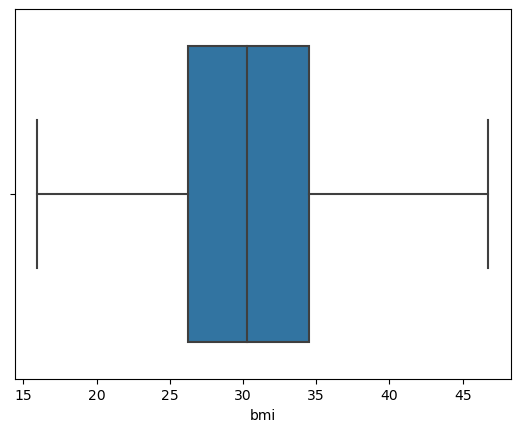

In [40]:
# Checking outliers for 'age' using boxplot
sns.boxplot(x=df1["bmi"])
plt.show()

##### Here we can also see that the bmi has no extra outlier present after remove the outliers its looks like perfect

In [41]:
#New seperate names 
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


##### Now the data df is convert into df1 

In [42]:
print("old DataFrame :",df.shape[0])  ## old dataframe
print("New DataFrame :",df1.shape[0])  ## new datafrme

old DataFrame : 1338
New DataFrame : 1329


In [43]:
# calculate the data loss
data_loss=df1.shape[0] - df.shape[0], df1.shape[1] - df.shape[1]

# print the data loss massage
print("Data Loss :",data_loss)

Data Loss : (-9, 0)


##### Here we can see that by removing the outliers. our 9 row were also removed.

In [44]:
print("Data Loss Percentage :",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage : 0.672645739910314


##### Here we can see percentage loss

# Now checking skewness

In [45]:
# Encoding Categorycal columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df1.columns:
    if df1[i].dtypes == "object":
        df1[i] = OE.fit_transform(df1[i].values.reshape(-1,1))

df1

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


#####  Here the sex column converted into numerical value where 0 indicate "Female" and 1 indicate "male" and smoker column yes indicate 1 and no indicate 0, and region column 3 indicate "Southwest" and 2 indicate "sounteast" and 1 indicate "northwest" and 0 indicate "norteast" .

In [46]:
# Now all data are convert into numerical from so no we check skewness
df1.skew()

age         0.058413
sex        -0.016573
bmi         0.157180
children    0.936628
smoker      1.471424
region     -0.031651
charges     1.500577
dtype: float64

##### Here we can see that the smoker and charges column is more skewness it is categorical data include in this columns so we no need to charges and smoker. But charges column is also high so now we will reduced the skewness of charges column 

# Removing skenwness

In [47]:
# Now we removing the charges column skewness using log
charges_col_skwns = df1["charges"].skew()
print("Skewness of 'charges' column before transformation :", charges_col_skwns)

Skewness of 'charges' column before transformation : 1.5005769673155465


In [48]:
# Aply Logarithmic transformation to "charges"
df1["log_charges"] = np.log1p(df1["charges"])

# Calculate skewness of transformed "log_charges"
log_charges_skewness = df1["log_charges"].skew()
print("Skewness of 'charges' column After transformation :",log_charges_skewness)

Skewness of 'charges' column After transformation : -0.09138628175661823


In [49]:
df1.skew()

age            0.058413
sex           -0.016573
bmi            0.157180
children       0.936628
smoker         1.471424
region        -0.031651
charges        1.500577
log_charges   -0.091386
dtype: float64

##### Here we can see that we reduced the charges column but the new columns also generated  when using log.

# Now we check how data is distributed

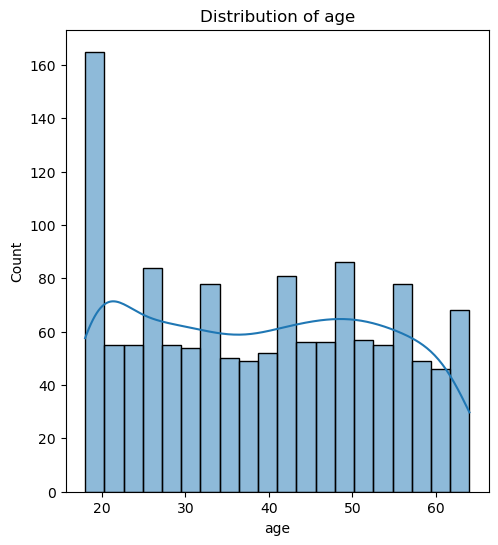

In [50]:
# Visualize distribution of "age","smoker","sex","children","bmi","region","log_charges" columns
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.histplot(df1["age"],bins=20,kde=True)
plt.title("Distribution of age")
plt.show()

Text(0.5, 1.0, 'distribution of sex')

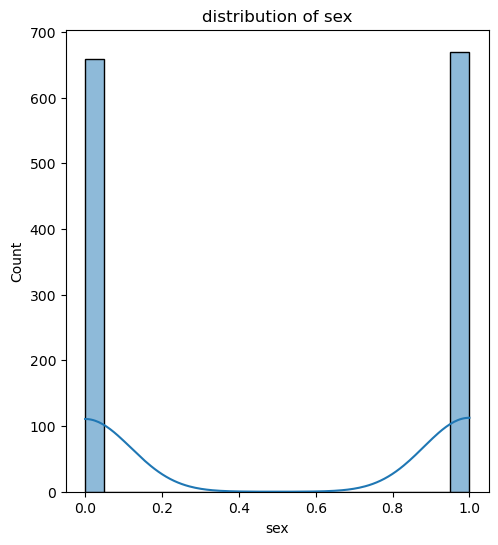

In [51]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df1["sex"],bins=20,kde=True)
plt.title("distribution of sex")

Text(0.5, 1.0, 'Distribustion of Children')

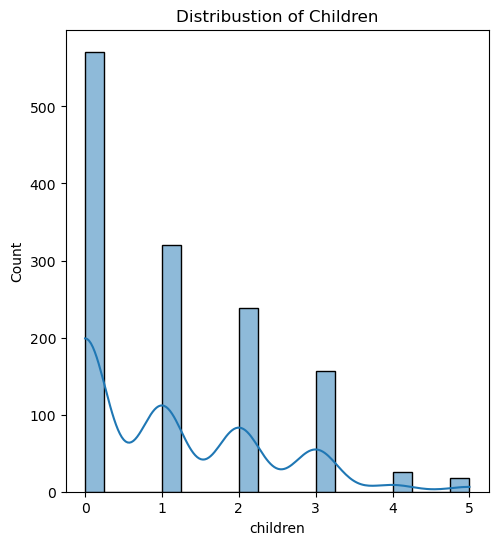

In [52]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.histplot(df1["children"],bins=20,kde=True)
plt.title("Distribustion of Children")

Text(0.5, 1.0, 'Distribustion of Smoker')

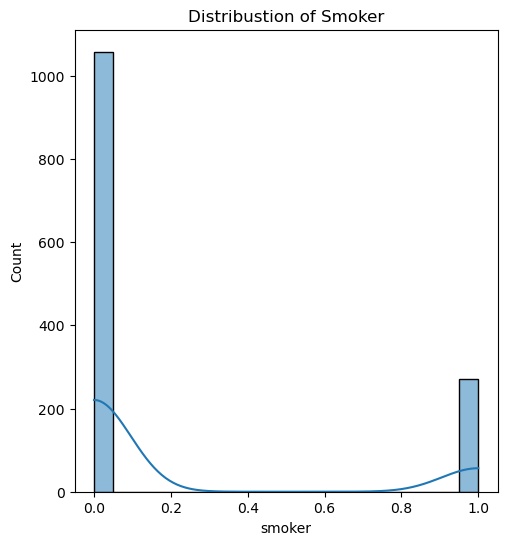

In [53]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.histplot(df1["smoker"],bins=20,kde=True)
plt.title("Distribustion of Smoker")

Text(0.5, 1.0, 'Distribustion of Bmi')

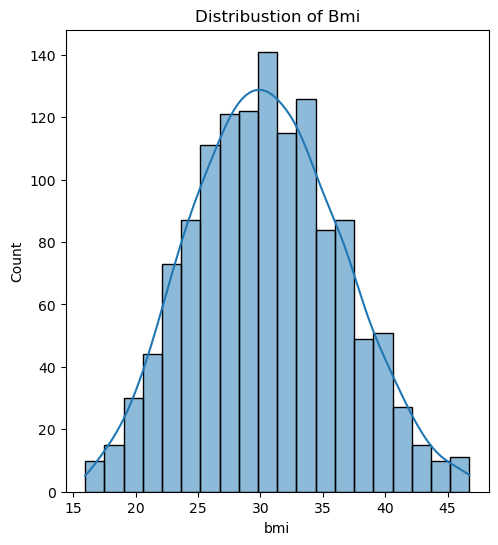

In [54]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.histplot(df1["bmi"],bins=20,kde=True)
plt.title("Distribustion of Bmi")

Text(0.5, 1.0, 'Distribustion of Region')

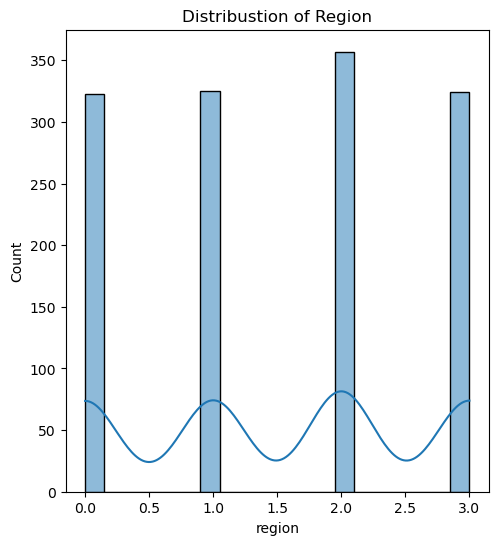

In [55]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.histplot(df1["region"],bins=20,kde=True)
plt.title("Distribustion of Region")

Text(0.5, 1.0, 'Distribustion of Log_Charges')

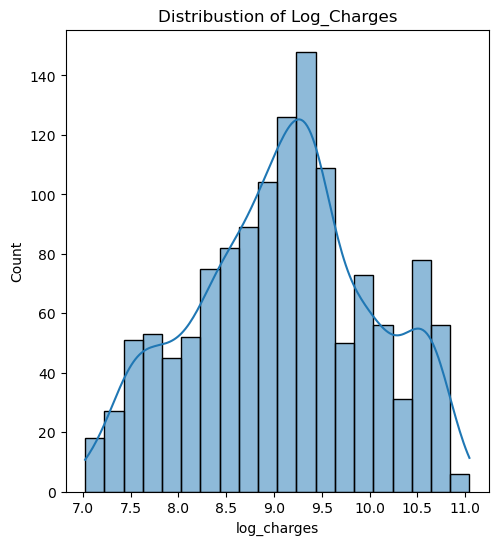

In [56]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.histplot(df1["log_charges"],bins=20,kde=True)
plt.title("Distribustion of Log_Charges")

In [57]:
df1.describe()

,age,sex,bmi,children,smoker,region,charges,log_charges
count,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000
mean,39.203913,0.504138,30.537348,1.096313,0.203913,1.513168,13212.333374,9.097210
std,14.047835,0.500171,5.919946,1.207928,0.403057,1.106532,11997.236429,0.916326
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,7.023647
25%,27.000000,0.000000,26.220000,0.000000,0.000000,1.000000,4738.268200,8.463638
50%,39.000000,1.000000,30.300000,1.000000,0.000000,2.000000,9361.326800,9.144449
75%,51.000000,1.000000,34.485000,2.000000,0.000000,2.000000,16586.497710,9.716405
max,64.000000,1.000000,46.750000,5.000000,1.000000,3.000000,62592.873090,11.044423


###### After Encoding the categorical columns we can see all columns details here. The counts of all columns are same that means now no null values are present in this datasets.

# Correlation

In [58]:
cor=df1.corr()
cor

,age,sex,bmi,children,smoker,region,charges,log_charges
age,1.000000,-0.019143,0.114686,0.043041,-0.024505,0.002806,0.302022,0.529296
sex,-0.019143,1.000000,0.039958,0.019281,0.079854,0.002963,0.063394,0.009959
bmi,0.114686,0.039958,1.000000,0.017355,-0.002871,0.155847,0.193196,0.133920
children,0.043041,0.019281,0.017355,1.000000,0.007577,0.017642,0.069739,0.161725
smoker,-0.024505,0.079854,-0.002871,0.007577,1.000000,-0.005181,0.785912,0.663619
region,0.002806,0.002963,0.155847,0.017642,-0.005181,1.000000,-0.010730,-0.044967
charges,0.302022,0.063394,0.193196,0.069739,0.785912,-0.010730,1.000000,0.893973
log_charges,0.529296,0.009959,0.133920,0.161725,0.663619,-0.044967,0.893973,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

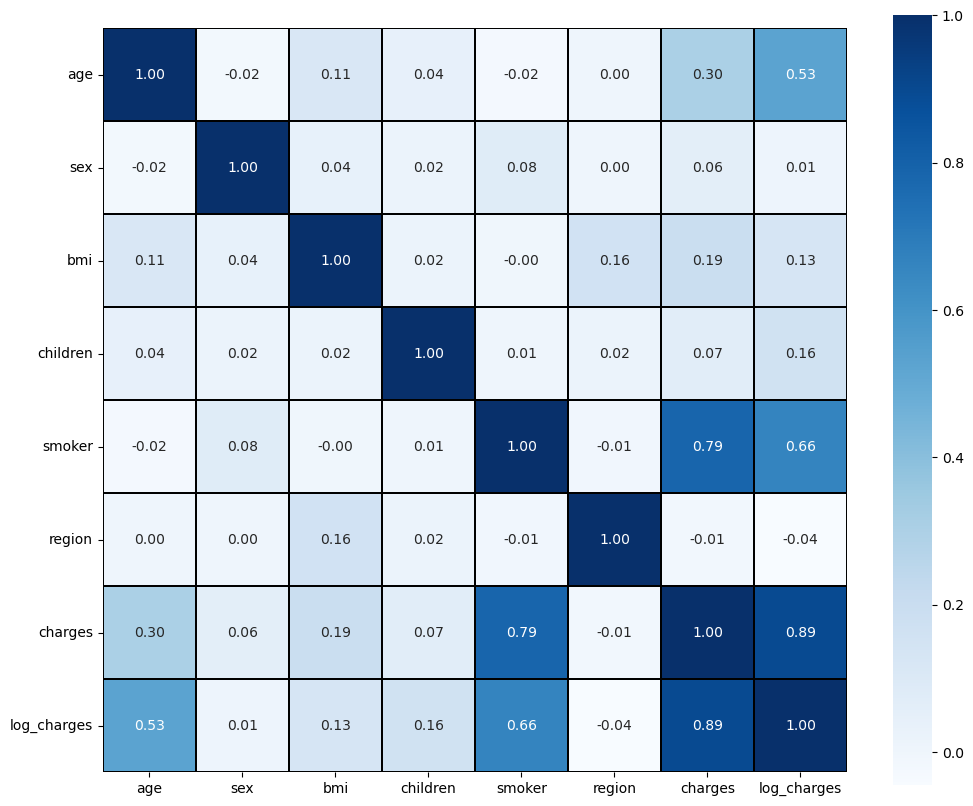

In [59]:
# Set the figure size
plt.figure(figsize=(12, 10))

# create the heatmap of the correlation matrix
sns.heatmap(df1.corr(),
           annot=True,            ## Show Corelation values on the hearmap
           cmap="Blues",          ## Set the color map to "blue"
           linewidth=0.1,         ## Set width between cells
           linecolor="black",     ## Color of the lines separating cell
           fmt=".2f",             ## Formate of annotations (2 decimal place)
           square=True)           ## Ensure cell are square-shaped

# Rotate y-axis labels to be horizantal
plt.yticks(rotation=0)

# Display the heatmap
plt.show

# Correlation between label and features

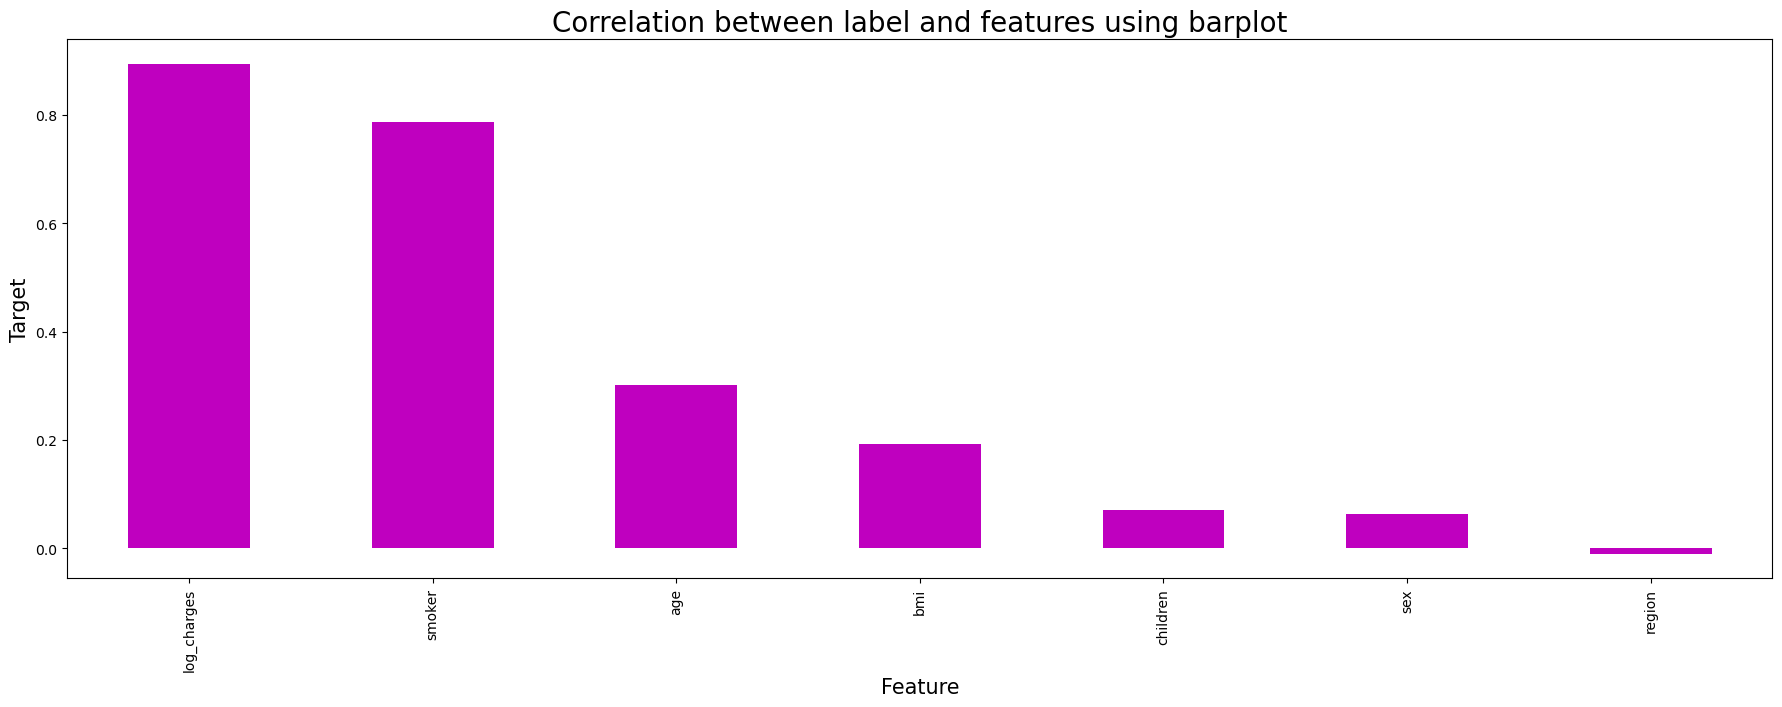

In [60]:
plt.figure(figsize=(22,7))
df1.corr()["charges"].sort_values(ascending=False).drop(["charges"]).plot(kind="bar",color="m")
plt.xlabel("Feature",fontsize=15)
plt.ylabel("Target",fontsize=15)
plt.title("Correlation between label and features using barplot",fontsize=20)
plt.show()

##### Here we can see region column is very low corrrelation to each other

# Split the feature and target

In [61]:
# Separating the independent and target variable anto x and y
x = df1.drop(["charges", "log_charges"], axis =1)  ## features we remove both charge and log_chrges
y = df1["log_charges"]           ### Here now the log charges is my target variabl                  
print("Feater Distributions = :",x.shape)
print("Label Distributions = :",y.shape)

Feater Distributions = : (1329, 6)
Label Distributions = : (1329,)


In [62]:
print(x)

      age  sex     bmi  children  smoker  region
0      19  0.0  27.900         0     1.0     3.0
1      18  1.0  33.770         1     0.0     2.0
2      28  1.0  33.000         3     0.0     2.0
3      33  1.0  22.705         0     0.0     1.0
4      32  1.0  28.880         0     0.0     1.0
...   ...  ...     ...       ...     ...     ...
1333   50  1.0  30.970         3     0.0     1.0
1334   18  0.0  31.920         0     0.0     0.0
1335   18  0.0  36.850         0     0.0     2.0
1336   21  0.0  25.800         0     0.0     3.0
1337   61  0.0  29.070         0     1.0     1.0

[1329 rows x 6 columns]


In [63]:
print(y)

0        9.734236
1        7.453882
2        8.400763
3        9.998137
4        8.260455
          ...    
1333     9.268755
1334     7.699381
1335     7.396847
1336     7.605365
1337    10.279948
Name: log_charges, Length: 1329, dtype: float64


# Feature scaling using standard scalirization

In [64]:
from sklearn.preprocessing import StandardScaler
#### Initialize StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns = x.columns)

### Display the standardscaler Dataframe
x

,age,sex,bmi,children,smoker,region
0,-1.438764,-1.008311,-0.445670,-0.907940,1.975869,1.344193
1,-1.509976,0.991757,0.546267,-0.079764,-0.506106,0.440128
2,-0.797855,0.991757,0.416149,1.576587,-0.506106,0.440128
3,-0.441794,0.991757,-1.323542,-0.907940,-0.506106,-0.463937
4,-0.513006,0.991757,-0.280065,-0.907940,-0.506106,-0.463937
...,...,...,...,...,...,...
1324,0.768813,0.991757,0.073111,1.576587,-0.506106,-0.463937
1325,-1.509976,-1.008311,0.233646,-0.907940,-0.506106,-1.368002
1326,-1.509976,-1.008311,1.066737,-0.907940,-0.506106,0.440128
1327,-1.296340,-1.008311,-0.800536,-0.907940,-0.506106,1.344193


# Find the best Model

In [65]:
## Importing the Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# Creating train test split

In [120]:
## Finding the best random state 
maxAccu= 0
maxRS = 0
for i in range(1,200):
    ## Spliting the data into train and test using current random state (i)
    x_tarin, x_test, y_tarin, y_test = train_test_split(x,y, test_size = 0.20, random_state=1)
    
    ## Initializing and training the GradientBoostingRegressor
    GBR = GradientBoostingRegressor()
    GBR.fit(x_tarin, y_tarin)
    pred = GBR.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i

print("maximum r2 score is :", maxAccu, "on Random_State", maxRS)

maximum r2 score is : 0.8446127552723541 on Random_State 83


In [121]:
x_tarin, x_test, y_tarin, y_test = train_test_split(x,y, test_size = 0.20, random_state=1)


In [122]:
x_tarin

,age,sex,bmi,children,smoker,region
638,1.552146,0.991757,0.570769,-0.907940,-0.506106,-1.368002
866,0.199115,0.991757,-0.959381,-0.907940,-0.506106,0.440128
1101,0.412752,0.991757,-1.721499,1.576587,-0.506106,0.440128
902,1.694570,0.991757,1.565240,1.576587,-0.506106,1.344193
1055,1.409722,0.991757,1.791679,-0.079764,1.975869,0.440128
...,...,...,...,...,...,...
715,1.338510,-1.008311,0.490502,-0.907940,-0.506106,-0.463937
905,-1.509976,0.991757,0.201539,-0.907940,1.975869,-1.368002
1096,-0.156945,0.991757,-0.124600,-0.907940,-0.506106,1.344193
235,-1.509976,-1.008311,-0.643381,-0.907940,-0.506106,0.440128


In [123]:
y_tarin

642      9.483786
872      8.694148
1109     9.060257
908      9.627146
1062    10.798989
          ...    
719      9.411861
911     10.426252
1104     9.924349
236      7.388184
1068     9.571565
Name: log_charges, Length: 1063, dtype: float64

In [124]:
x_test

,age,sex,bmi,children,smoker,region
453,1.124873,-1.008311,-0.067145,0.748411,-0.506106,0.440128
1129,-0.940279,-1.008311,-1.403809,-0.907940,-0.506106,-0.463937
1118,1.124873,0.991757,-0.107702,-0.907940,-0.506106,1.344193
115,1.480934,0.991757,-0.328226,-0.907940,-0.506106,-1.368002
1153,-0.370582,0.991757,1.958973,0.748411,-0.506106,0.440128
...,...,...,...,...,...,...
8,-0.156945,0.991757,-0.119530,0.748411,-0.506106,-1.368002
241,1.124873,-1.008311,-0.631552,-0.079764,-0.506106,1.344193
602,-0.869067,-1.008311,-0.906151,-0.907940,-0.506106,-1.368002
491,-1.296340,0.991757,-0.817435,2.404762,1.975869,1.344193


In [125]:
y_test

456      9.382862
1137     8.063783
1126     9.231675
115     10.317615
1161     8.541923
          ...    
8        8.765211
242     10.467697
606      8.177409
494      9.794961
1006     8.398244
Name: log_charges, Length: 266, dtype: float64

In [126]:
## Assuming x_train y_train x_test y_test are your dataset
print("X_train_shape :",x_tarin.shape)
print("X_test_shape :",x_test.shape)
print("Y_train_shape :",y_tarin.shape)
print("Y_test_shape :",y_test.shape)

X_train_shape : (1063, 6)
X_test_shape : (266, 6)
Y_train_shape : (1063,)
Y_test_shape : (266,)


In [127]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor

# Linear Regression

In [128]:
lr = LinearRegression()
lr.fit(x_tarin,y_tarin)
pred_lr = lr.predict(x_test)
pred_train = lr.predict(x_tarin)
print(lr)

LinearRegression()


In [129]:
print("r2_score :",r2_score(y_test,pred_lr))
print("r2 score on training data :",r2_score(y_tarin,pred_train)*100)
print("Mean Absolute Error :",mean_absolute_error(y_test,pred_lr))
print("Mean Squared Error :",mean_squared_error(y_test,pred_lr))
print("root mean Squared Error :",np.sqrt(mean_squared_error(y_test,pred_lr)))

r2_score : 0.7628169861616181
r2 score on training data : 76.65090943487253
Mean Absolute Error : 0.27295843189888847
Mean Squared Error : 0.18479022266755996
root mean Squared Error : 0.4298723329868532


# Random Forest Regressor

In [130]:
RFR = RandomForestRegressor()
RFR.fit(x_tarin,y_tarin)
pred_RFR = RFR.predict(x_test)
pred_train = RFR.predict(x_tarin)

In [131]:
print("r2_score :",r2_score(y_test,pred_RFR))
print("r2_score on training data :",r2_score(y_tarin,pred_train)*100)
print("mean absulate error :",mean_absolute_error(y_test,pred_RFR))
print("mean squared error :",mean_squared_error(y_test,pred_RFR))
print("root mean squared error :",np.sqrt(mean_squared_error(y_test,pred_RFR)))

r2_score : 0.7971557494320163
r2_score on training data : 97.06281504631747
mean absulate error : 0.21239675219686718
mean squared error : 0.15803675660700406
root mean squared error : 0.3975383712385561


# K Neighbors Regressor

In [132]:
knn = KNN()
knn.fit(x_tarin,y_tarin)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_tarin)

In [133]:
print("R2_score :",r2_score(y_test,pred_knn))
print("R2_score training data :",r2_score(y_tarin,pred_train)*100)
print("mean absolute error :",mean_absolute_error(y_test,pred_knn))
print("mean absolute error :",mean_absolute_error(y_test,pred_knn))
print("Root mean squared error :",np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_score : 0.7958281932340134
R2_score training data : 85.61718992555112
mean absolute error : 0.25524457226941855
mean absolute error : 0.25524457226941855
Root mean squared error : 0.39883713578741586


# Gradient Booster Regressor

In [134]:
GBR = GradientBoostingRegressor()
GBR.fit(x_tarin,y_tarin)
pred_GBR = GBR.predict(x_test)
pred_train = GBR.predict(x_tarin)

In [135]:
print("R2_score :",r2_score(y_test,pred_GBR))
print("R2_score training data :",r2_score(y_tarin,pred_train)*100)
print("mean absolute eror :",mean_absolute_error(y_test,pred_GBR))
print("mean squared error :",mean_squared_error(y_test,pred_GBR))
print("root mean squared error :",np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score : 0.8430349277610691
R2_score training data : 88.58694332889623
mean absolute eror : 0.19324824660668352
mean squared error : 0.12229210760356676
root mean squared error : 0.3497028847515656


# Decision Tree Regressor

In [136]:
dtr = DecisionTreeRegressor()
dtr.fit(x_tarin,y_tarin)
pred_dtr = dtr.predict(x_test)
pred_train = dtr.predict(x_tarin)

In [137]:
print("R2_score :",r2_score(y_test,pred_dtr))
print("r2_score training data :",r2_score(y_tarin,pred_train)*100)
print("mean absolute error :",mean_absolute_error(y_test,pred_dtr))
print("mean squared error :",mean_squared_error(y_test,pred_dtr))
print("root mean squared error :",np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2_score : 0.6451520321270314
r2_score training data : 99.45952337286379
mean absolute error : 0.24702096377545074
mean squared error : 0.27646345299018127
root mean squared error : 0.5257979202984558


# Support Vector Regressor

In [138]:
svr = SVR()
svr.fit(x_tarin,y_tarin)
pred_svr = svr.predict(x_test)
pred_train = svr.predict(x_tarin)

In [139]:
print("R2_score :",r2_score(y_test,pred_svr))
print("R2_score traning data :",r2_score(y_tarin,pred_train)*100)
print("mean absolute error :",mean_absolute_error(y_test,pred_svr))
print("mean squared error :",mean_squared_error(y_test,pred_svr))
print("root mean squared error :",np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_score : 0.8348048482737018
R2_score traning data : 84.06232327509026
mean absolute error : 0.17304342078152593
mean squared error : 0.12870419503103583
root mean squared error : 0.35875366901404065


# Checking cross validation score

In [140]:
from sklearn.model_selection import cross_val_score

In [141]:
score = cross_val_score(lr,x,y,cv=5,scoring = "r2")
print(score)
print(score.mean())
print("Difference between r2 score and cross validation score is:- ",(r2_score(y_test,pred_lr)-score.mean())*100)

[0.79826833 0.68874983 0.82870346 0.76453    0.73208842]
0.7624680089658248
Difference between r2 score and cross validation score is:-  0.034897719579329856


In [142]:
score = cross_val_score(RFR,x,y,cv=5,scoring = "r2")
print(score)
print(score.mean())
print("Difference between r2 score and cross validation score is:- ",(r2_score(y_test,pred_RFR)-score.mean())*100)

[0.85333597 0.70389148 0.86216489 0.81425677 0.78529989]
0.803789800827742
Difference between r2 score and cross validation score is:-  -0.6634051395725704


In [143]:
score = cross_val_score(knn,x,y,cv=5,scoring = "r2")
print(score)
print(score.mean())
print("Difference between r2 score and cross validation score is:- ",(r2_score(y_test,pred_knn)-score.mean())*100)

[0.84904787 0.68921968 0.84257334 0.80867779 0.78275127]
0.7944539919133988
Difference between r2 score and cross validation score is:-  0.13742013206146098


In [144]:
score = cross_val_score(GBR,x,y,cv=5,scoring = "r2")
print(score)
print(score.mean())
print("Difference between r2 score and cross validation score is:- ",(r2_score(y_test,pred_GBR)-score.mean())*100)

[0.87638098 0.72918672 0.90165592 0.83798997 0.79837057]
0.8287168326906151
Difference between r2 score and cross validation score is:-  1.4318095070454007


In [145]:
score = cross_val_score(svr,x,y,cv=5,scoring = "r2")
print(score)
print(score.mean())
print("Difference between r2 score and cross validation score is:- ",(r2_score(y_test,pred_svr)-score.mean())*100)

[0.89426814 0.71757594 0.90961898 0.83399235 0.8017646 ]
0.8314440028723483
Difference between r2 score and cross validation score is:-  0.3360845401353507


##### From defference between r2 score and cross validation score computed on r2 score we can conclude that K neighbors regrassor as our fitting and best fiting and best performing model


# Hyper parameter tuning

In [146]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [152]:
# Define the model
knn = KNeighborsRegressor()

# Define the parameter grid
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=grid_params,cv=5,scoring="r2")
#grid_search = GridSearchCV(knn(), grid_params, verbose = 1, cv=3, n_jobs = -1)

# fit the grid search to find the best parameters
grid_search.fit(x_tarin,y_tarin)

# print the best paraeter and best score
print("best_parameters :", grid_search.best_params_)
print("best R2 score :", grid_search.best_score_)


best_parameters : {'metric': 'minkowski', 'n_neighbors': 15, 'weights': 'uniform'}
best R2 score : 0.8064964375675661


In [153]:
# Initialize knn regrassor with best hyperparameter
knn_regressor=KNeighborsRegressor(n_neighbors=9, weights="uniform",algorithm="auto")

In [154]:
# train the knn regressor
knn_regressor.fit(x_tarin,y_tarin)

KNeighborsRegressor(n_neighbors=9)

In [155]:
# Model prediction
y_pred=knn_regressor.predict(x_test)

In [156]:
from sklearn.metrics import r2_score , mean_squared_error

In [160]:
# Calculate r2 score 
r2 = r2_score(y_test,y_pred)
print("r2_score :",r2)

r2_score : 0.8093456329173832


In [161]:
# Calculate mean squared error
mse = mean_squared_error(y_test,y_pred)
print("Mean squared error :",mse)

Mean squared error : 0.14853957024825631


# Now saving the model using joblib library

In [163]:
# Saving the model
import joblib
joblib.dump(knn_regressor,"medical_cost_insurance.pkl")

['medical_cost_insurance.pkl']

In [165]:
# Open the File
import pickle
filename = "medical_cost_insurance.pkl"
pickle.dump(knn_regressor, open(filename,"wb"))  # saved model

In [166]:
load_model = pickle.load(open("medical_cost_insurance.pkl","rb"))
result = load_model.score(x_test,y_test)
print(result*100)

80.93456329173831


##### Almost 81 % accuracy

In [167]:
## Here the values is come in this type because we have reduced the skewness of the charges column so that why values is predict this type

conclusion = pd.DataFrame([load_model.predict(x_test)[:],y_test[:]],index=["predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
predicted,9.315478,8.304437,9.355568,9.434668,8.550479,10.435861,9.522734,8.235116,9.423590,7.820853,...,10.583193,8.852518,9.436977,7.720113,9.060326,9.077186,9.358057,8.085738,10.060176,8.679606
Original,9.382862,8.063783,9.231675,10.317615,8.541923,10.643521,9.508354,7.464059,9.387587,9.887070,...,10.522312,10.256878,9.474254,8.030022,9.159213,8.765211,10.467697,8.177409,9.794961,8.398244


# Here we predict medical insurance cost

In [176]:
# Define input data (medical characteristics)
input_data = np.array([[21,0.0,25.800,0,0.0,3.0]]) # Example input data (single sample)

# Make prediction using the trained SVR model
prediction = knn_regressor.predict(input_data)  # Use "svr" for prediction 
print("prediction insurance cost :", prediction)

prediction insurance cost : [9.4322975]


In [177]:
# Example predicted value from a model in log-transformed scale 
predicted_log_value = prediction

In [178]:
# Aply esxponential transformation to convert the predicted value back to original scale
predicted_log_value = np.expm1(predicted_log_value)

In [179]:
# print the convert predicted value in the original scale
print("Here is the predicted charge for medical insurance :",predicted_log_value)

Here is the predicted charge for medical insurance : [12484.17848705]
